# Check results of k-folds throughout training

In [31]:
import os
import crested
import anndata
import keras
import matplotlib

# Set the font type to ensure text is saved as whole words
%matplotlib inline
matplotlib.rcParams["pdf.fonttype"] = 42  # Use TrueType fonts instead of Type 3 fonts
matplotlib.rcParams["ps.fonttype"] = 42  # For PostScript as well, if needed
matplotlib.rcParams['figure.dpi'] = 400

In [4]:
data_files_root = "../../../../../../../data/hydrop_v2_paper/mcortex/paper_zips/10x_hydropv2_comparisons_data/anndatas"
adata_path_10x = os.path.join(data_files_root, "10x_allcells_allreads/normalized_specific.h5ad")
adata_path_hydrop = os.path.join(data_files_root, "hydrop_allcells_allreads/normalized_specific.h5ad")
model_folder_10x = "../../../../../../../data/hydrop_v2_paper/mcortex/paper_zips/10x_hydropv2_comparisons_models/finetuned/10x_allcells_allreads"
model_folder_hydrop = "../../../../../../../data/hydrop_v2_paper/mcortex/paper_zips/10x_hydropv2_comparisons_models/finetuned/hydrop_allcells_allreads"

genome_path = "../../../../../../../data/genomes/refdata-cellranger-arc-mm10-2020-A-2.0.0/fasta/genome.fa"
consensus_regions_file = "../../../../../../../data/hydrop_v2_paper/mcortex/paper_zips/10x_hydropv2_comparisons_data/consensus_regions_mouse_cleanup_annot_all_data_fulldepth.bed"

In [5]:
# load all models
models_10x = [keras.models.load_model(os.path.join(model_folder_10x, model_path), compile=False) for model_path in os.listdir(model_folder_10x)]
models_hydropv2 = [keras.models.load_model(os.path.join(model_folder_hydrop, model_path), compile=False) for model_path in os.listdir(model_folder_hydrop)]

assert len(models_10x) == 10 # 10 folds
assert len(models_hydropv2) == 10 # 10 folds

I0000 00:00:1753718910.731103 2085837 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79196 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:ca:00.0, compute capability: 8.0


In [6]:
adata_10x = anndata.read_h5ad(
    adata_path_10x
)
adata_hydropv2 = anndata.read_h5ad(
    adata_path_hydrop
)

In [7]:
genome = crested.Genome(genome_path, name="mm10")
crested.register_genome(genome)

2025-07-28T18:09:41.975121+0200 INFO Genome mm10 registered.


## Fire Enhancer

In [10]:
chrom = 'chr18'
start = 61107770
end = 61109884
sequence = genome.fetch(chrom, start, end)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


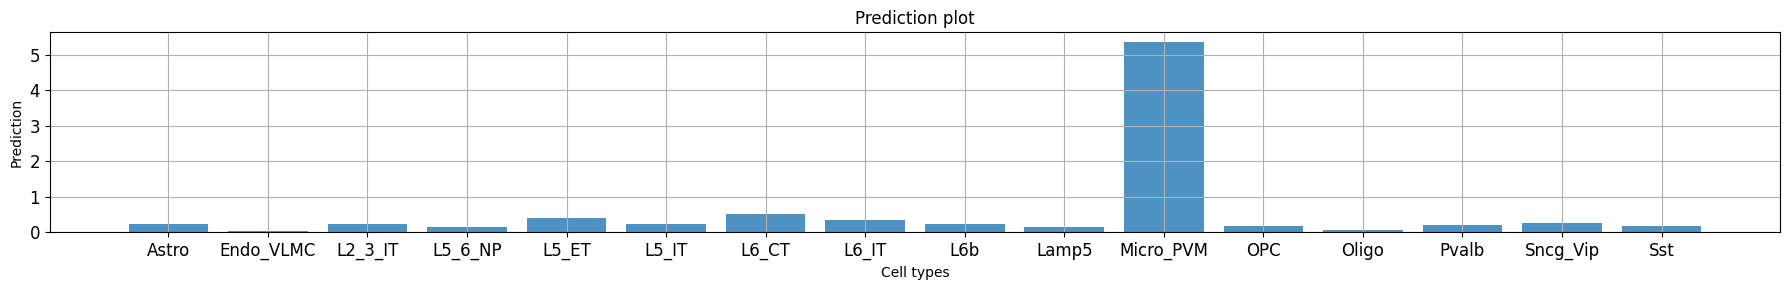

In [11]:
prediction = crested.tl.predict(sequence, models_10x)
crested.pl.bar.prediction(prediction, classes=list(adata_10x.obs_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


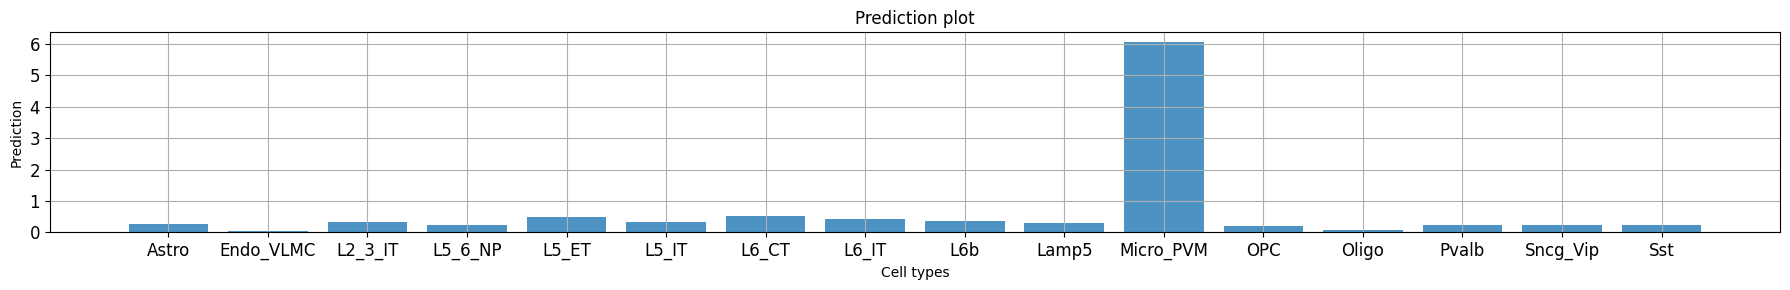

In [12]:
prediction = crested.tl.predict(sequence, models_hydropv2)
crested.pl.bar.prediction(prediction, classes=list(adata_hydropv2.obs_names))

In [13]:
regions_of_interest = [
    "chr18:61107770-61109884"
]  
classes_of_interest = ["Micro_PVM"]
class_idx = list(adata_10x.obs_names.get_indexer(classes_of_interest))

2025-07-28T18:30:12.174277+0200 INFO Calculating contribution scores for 1 class(es) and 1 region(s).


Model: 100%|██████████| 10/10 [00:00<00:00, 10.83it/s]


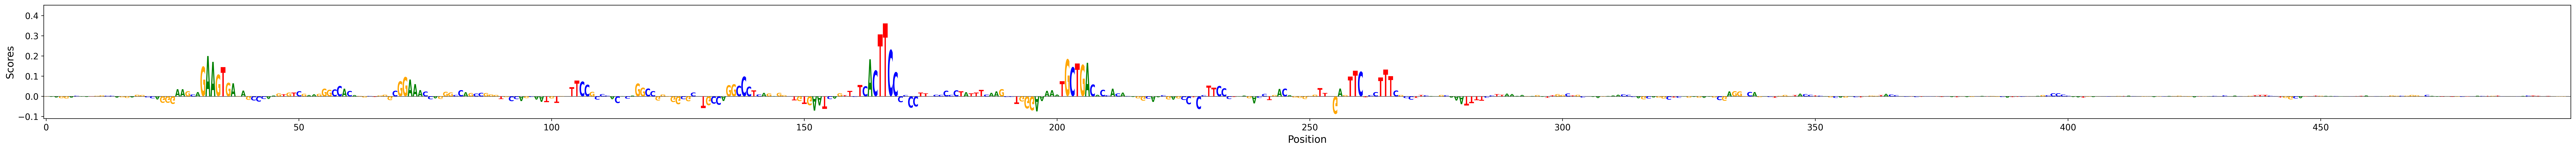

In [32]:
# 10x
scores, one_hot_encoded_sequences = crested.tl.contribution_scores(
    regions_of_interest,
    target_idx=class_idx,
    model=models_10x,
    method="integrated_grad",
)
crested.pl.patterns.contribution_scores(
    scores,
    one_hot_encoded_sequences,
    zoom_n_bases=500,
    height=3,
    save_path="../../../plots/contribution_scores_fire_enhancer_10x.pdf",
)

2025-07-28T18:30:17.807588+0200 INFO Calculating contribution scores for 1 class(es) and 1 region(s).


Model: 100%|██████████| 10/10 [00:00<00:00, 12.33it/s]


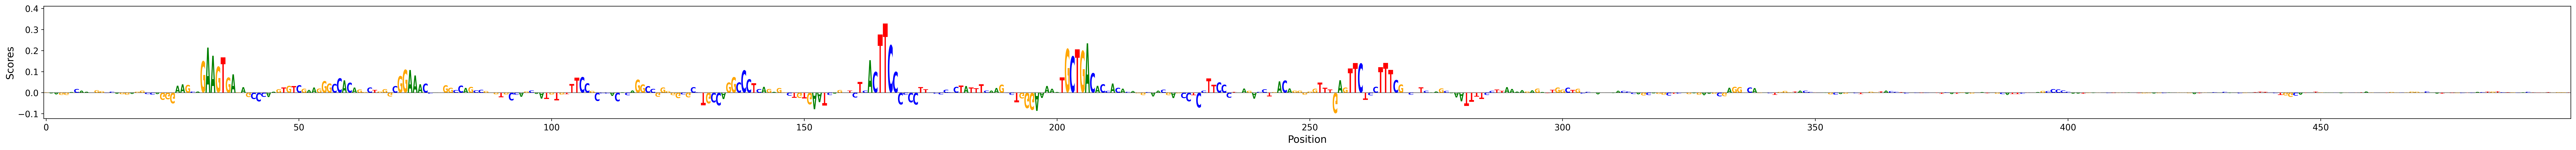

In [33]:
# now for hydrop
scores, one_hot_encoded_sequences = crested.tl.contribution_scores(
    regions_of_interest,
    target_idx=class_idx,
    model=models_hydropv2,
    method="integrated_grad",
)

crested.pl.patterns.contribution_scores(
    scores,
    one_hot_encoded_sequences,
    zoom_n_bases=500,
    height=3,
    save_path="../../../plots/contribution_scores_fire_enhancer_hydrop.pdf",
)